# *******************SUGARCANE PRODUCTION PROJECT ----- OVERVIEW*******************


This project analyzes global sugarcane production by exploring key factors like production volume, land usage, and yield per hectare across different countries and continents. Through comprehensive Exploratory Data Analysis (EDA), we'll identify top-producing regions, understand relationships between variables, and visualize the distribution of production. The insights gained will help inform agricultural strategies and enhance resource management in the sugarcane industry.

### Data Cleaning
1. Data Cleaning Process
Before diving into analysis, we first clean the dataset to ensure the data is accurate and usable.

Remove Unwanted Characters
In the dataset "List of Countries by Sugarcane Production," we clean the numerical columns by removing unwanted characters such as periods (.) and commas (,). This ensures that the data is in a proper format for numerical computations.
Actions:
Remove periods from "Production (Tons)" and "Acreage (Hectare)" columns.
Replace commas with periods in "Production per Person (Kg)" to standardize decimal notation.
Remove Unwanted Columns
The dataset contains extra columns like "Unnamed: 0" that are not necessary for the analysis. We can remove these using the drop() function:
Drop the "Unnamed: 0" column using axis=1.
Rename Columns for Consistency
We clean up column names to remove any extra spaces or special characters for consistency.
Change "Production (Tons)" to "Production(Tons)" (remove spaces).
Rename other columns similarly.
### 2. Checking Missing Values
Checking for missing values is critical, as it can impact the results of our analysis. The isna().sum() function helps identify columns with missing values.

Missing Values Output:
Country                      0
Continent                    0
Production(Tons)             0
Production_per_person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64
Handling Missing Values:
Drop the rows with missing values in "Acreage(Hectare)" and "Yield(Kg/Hectare)" columns.
Reset the index after dropping rows to ensure clean data.
### 3. Data Conversion
We convert numerical columns related to production, acreage, and yield into the appropriate data types (float) to facilitate analysis.

Univariate Analysis
In univariate analysis, we focus on understanding each variable individually. This includes examining distribution, central tendencies, and any potential outliers.

#### 1. How Many Countries Produce Sugarcane from Each Continent?
By using the "Continent" column, we identify how many countries produce sugarcane in each continent.

Result:
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
We can visualize this using a bar chart to highlight the geographical distribution of sugarcane production.

#### 2. Distribution of Key Variables
We analyze the distribution of the following columns using histograms:

Production (Tons)
Production per Person (Kg)
Acreage (Hectare)
Yield (Kg/Hectare)
Using sns.distplot(), we visualize the distribution of these variables, helping us identify skewness, normality, and outliers.

Production(Tons): Skewed with a few countries (Brazil, India, China) having extremely high production.
Production per Person (Kg): Skewed with a few countries showing much higher production per person.
Acreage (Hectare): Less skewed compared to production.
Yield (Kg/Hectare): Varies by country; efficient farming shows high yield.
3. Outlier Detection with Boxplots
Boxplots help visually identify outliers in the dataset.

#### Key Insights from Boxplots:
Production(Tons): Outliers are visible, indicating countries like Brazil, India, and China contribute disproportionately.
Yield (Kg/Hectare): High-yielding countries stand out as outliers.
4. Violin Plot for Production (Tons)
A violin plot helps better understand the distribution of "Production (Tons)" and identify skewness, spread, and outliers.

#### Expected Insights:
Wide spread with skewness.
A few countries with very high production values.
Bivariate Analysis
Bivariate analysis investigates relationships between two variables to identify any correlations or patterns.

1. Which Country Has the Highest Acreage (Land)?
Using a bar plot, we identify the top 15 countries with the largest sugarcane acreage, showing that Brazil, India, and China dominate the land area dedicated to sugarcane cultivation.

2. Which Country Has the Highest Yield per Hectare?
By analyzing yield per hectare, we identify Guatemala as the country with the highest yield, indicating efficient farming techniques.

3. Which Country Has the Highest Production per Person?
We use production per person (Kg) to determine that Paraguay leads in production efficiency relative to population size.

4. Correlation Analysis
We perform a correlation analysis to understand the relationships between key variables:

Production (Tons) and Acreage (Hectare): Strong positive correlation (0.997).
Production (Tons) and Yield (Kg/Hectare): Low correlation (0.132).
We visualize the correlation using a heatmap.

5. Do Countries with the Highest Land Produce More Sugarcane?
We create a scatter plot to show the relationship between Acreage (Hectare) and Production (Tons). The plot confirms that larger land areas correlate with higher production.

6. Do Countries Yield More Sugarcane per Hectare Produce More Sugarcane in Total?
Another scatter plot explores the relationship between Yield (Kg/Hectare) and Production (Tons). The plot indicates that higher yields do not always correlate with higher total production.

Continental Analysis
1. Analyzing Sugarcane Production by Continent
We group the data by continent and sum the key metrics to analyze global production trends.

Total Production by Continent:
South America: Leading producer.
Asia: Second in production.
Africa: Third.
We visualize this using a bar plot.

2. Does the Number of Countries in a Continent Affect Sugarcane Production?
We analyze the impact of the number of countries on sugarcane production per continent.

#### Key Insight:
Even continents with fewer countries (e.g., South America) can have high total production due to a few dominant producers (e.g., Brazil).
### Conclusion
This project provides a comprehensive analysis of global sugarcane production, offering insights into the distribution of production, the role of land usage, and yield efficiency across different countries and continents. By understanding these factors, agricultural strategies can be improved, and resource management in the sugarcane industry can be optimized.



In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [3]:
df = pd.read_csv("List of Countries by Sugarcane Production.csv")

In [5]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [7]:
df.shape

(103, 7)

# Data Cleaning

In [10]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]= df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [12]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [14]:
df = df.drop( "Unnamed: 0", axis = 1)


In [16]:
df.rename(columns= {"Production (Tons)": "Production(Tons)"}, inplace = True)
df.rename(columns= {"Production per Person (Kg)": "Production_per_person(Kg)"}, inplace = True)
df.rename(columns= {"Acreage (Hectare)": "Acreage(Hectare)"}, inplace = True)
df.rename(columns= {"Yield (Kg / Hectare)": "Yield(Kg/Hectare)"}, inplace = True)


In [18]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [20]:
df.isna().sum()

Country                      0
Continent                    0
Production(Tons)             0
Production_per_person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [22]:
df[df["Acreage(Hectare)"].isnull()]


,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,Djibouti,Africa,53,51,NaN,NaN


In [24]:
df = df.dropna().reset_index().drop("index", axis = 1)

In [26]:
df

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...
97,Spain,Europe,394,8,9,43596.5
98,Lebanon,Asia,97,16,3,28386.4
99,Singapore,Asia,50,9,2,25
100,Samoa,Oceania,12,6,1,11949.8


In [28]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

In [30]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [32]:
df["Production(Tons)"] = df["Production(Tons)"].astype(float)
df["Production_per_person(Kg)"] = df["Production_per_person(Kg)"].astype(float)
df["Acreage(Hectare)"] = df["Acreage(Hectare)"].astype(float)
df["Yield(Kg/Hectare)"] = df["Yield(Kg/Hectare)"].astype(float)

In [36]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

# Univariate Analysis

In [39]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0



## How many countries produce sugarcane from each continent?

In [42]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

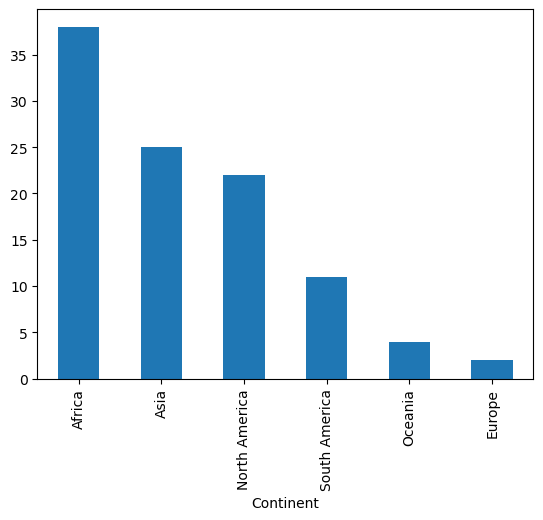

In [44]:

df["Continent"].value_counts().plot(kind = "bar")

#### Africa has maximum number of countries which produces sugarcane

In [47]:
df.describe()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


### Checking outliers

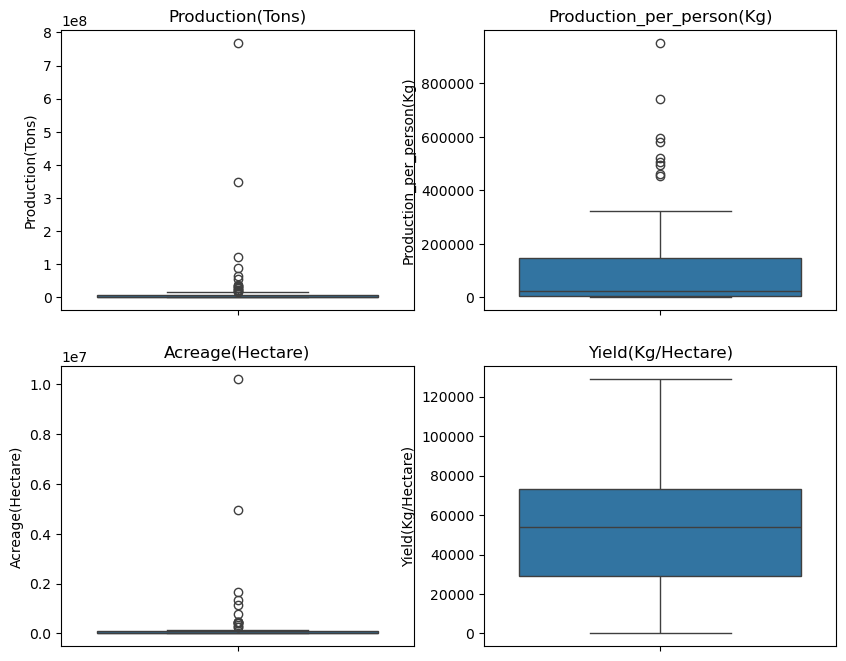

In [51]:
plt.figure(figsize = (10,8))
plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])
plt.title("Production(Tons)")
plt.subplot(2,2,2)
sns.boxplot(df["Production_per_person(Kg)"])
plt.title("Production_per_person(Kg)")
plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")
plt.subplot(2,2,4)
sns.boxplot(df["Yield(Kg/Hectare)"])
plt.title("Yield(Kg/Hectare)")
plt.show()

#### we have outliers in the data but outliers are required here as it shows the countries which has maximum production. And then we can see what are the reasons for outliers.

## Distribution of the columns

C:\Users\Satyam Jha\AppData\Local\Temp\ipykernel_18588\3058811994.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production(Tons)"])
C:\Users\Satyam Jha\AppData\Local\Temp\ipykernel_18588\3058811994.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production_per_person(Kg)"])
C:\

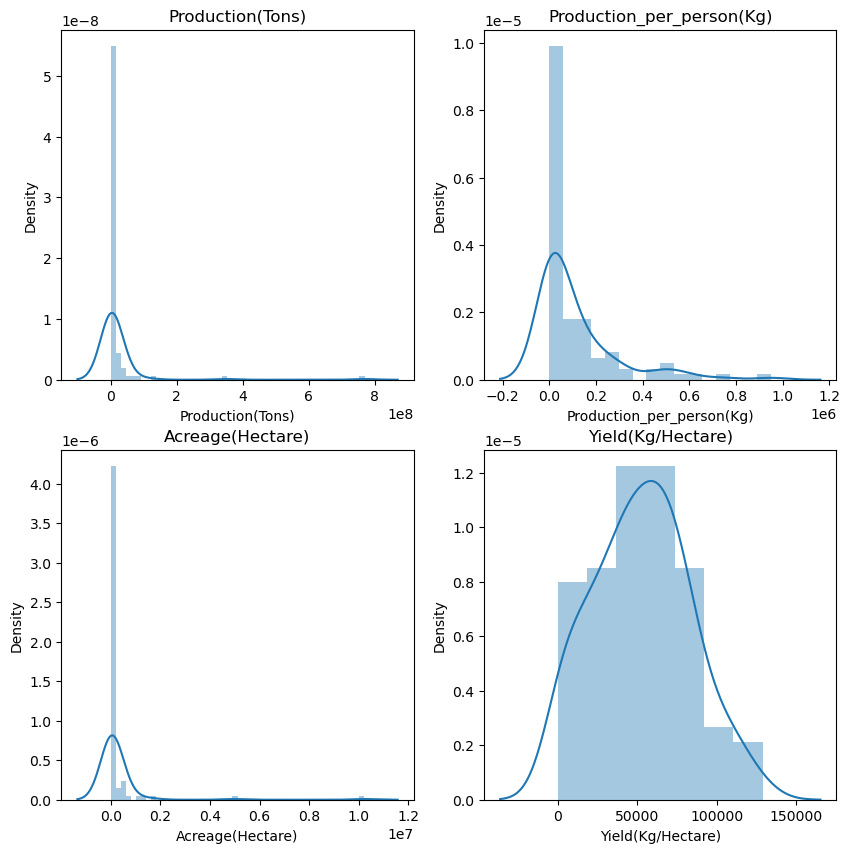

In [55]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production(Tons)"])
plt.title("Production(Tons)")
plt.subplot(2,2,2)
sns.distplot(df["Production_per_person(Kg)"])
plt.title("Production_per_person(Kg)")
plt.subplot(2,2,3)
sns.distplot(df["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")
plt.subplot(2,2,4)
sns.distplot(df["Yield(Kg/Hectare)"])
plt.title("Yield(Kg/Hectare)")
plt.show()


<Axes: ylabel='Production(Tons)'>

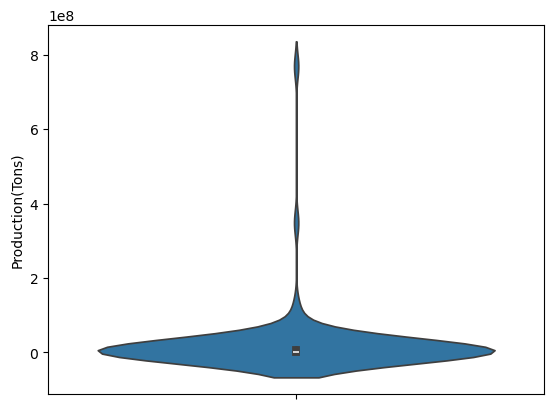

In [57]:
sns.violinplot(df["Production(Tons)"])

## Bivariate Analysis

In [60]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## Which country produces maximum sugarcane?

In [63]:
df_new = df[["Country","Production(Tons)"]].set_index("Country")

In [65]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [67]:
df_new["Production(Tons)_percent"] = df_new["Production(Tons)"]*100/df_new["Production(Tons)"].sum()


In [69]:
df_new

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_percent'>

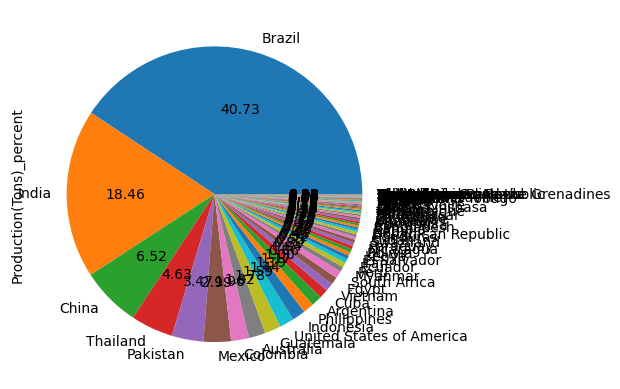

In [71]:
df_new["Production(Tons)_percent"].plot(kind = "pie", autopct = "%.2f")

#### Brazil, India and China have 65% of production of sugarcane

<Axes: xlabel='Country'>

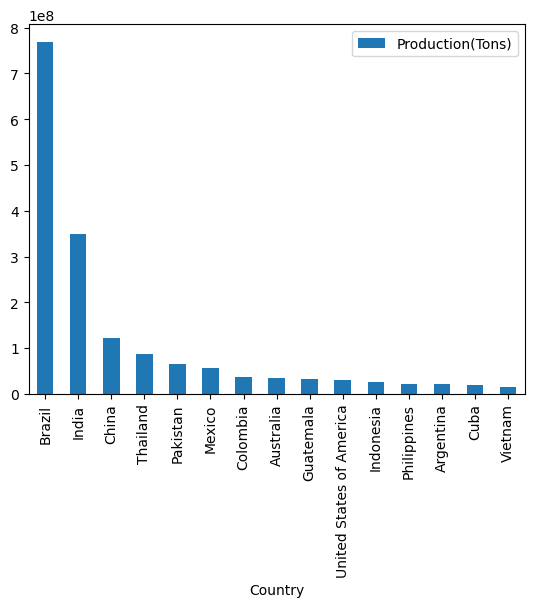

In [74]:
df[["Country","Production(Tons)"]].set_index("Country").sort_values("Production(Tons)", ascending = False).head(15).plot(kind = "bar")

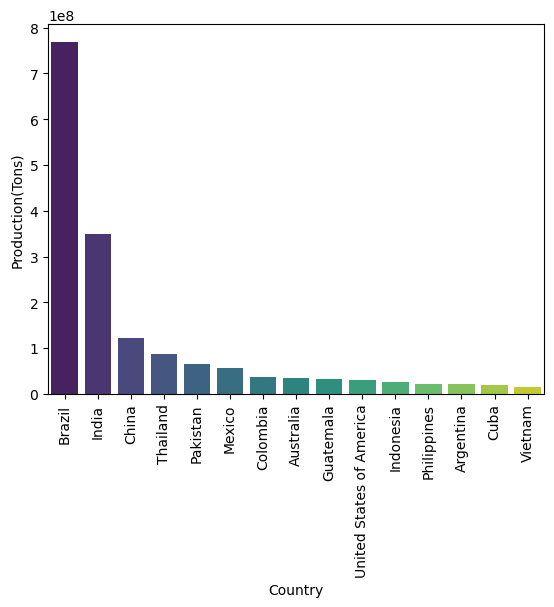

In [88]:
ax = sns.barplot(data=df.head(15), 
                x="Country", 
                y="Production(Tons)",
                hue = "Country",
                palette="viridis",legend = False)  # Keep the color palette

# First set the ticks, then set the labels with rotation
ax.set_xticks(range(len(df.head(15))))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Remove the legend line completely
plt.show()

#### The country "Brazil" produces maximum sugarcane out of all countries.

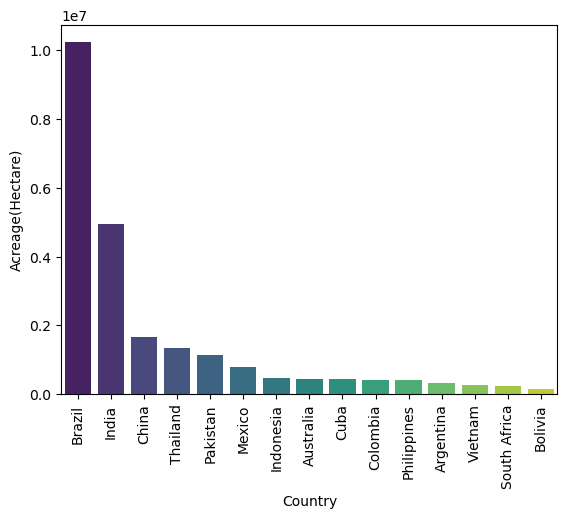

In [95]:
df_acr = df.sort_values("Acreage(Hectare)", ascending = False).head(15)
ax = sns.barplot(data = df_acr,  x= "Country", y = "Acreage(Hectare)", hue = "Country", palette = "viridis",legend = False)
ax.set_xticks(range(len(df_acr["Country"])))
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()


## Which country has highest yield per hectare?

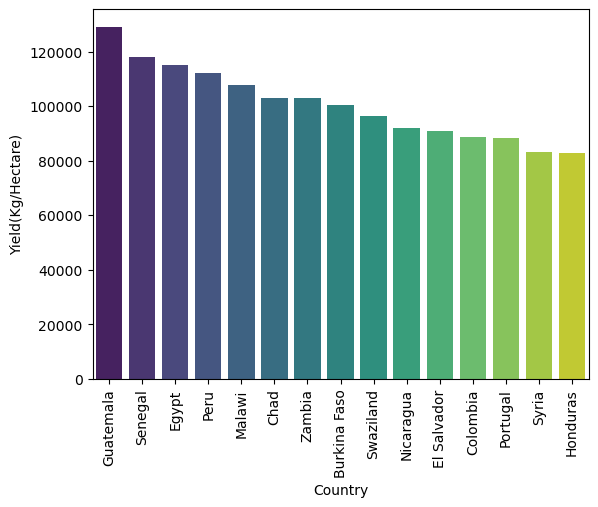

In [98]:
df_yield = df.sort_values("Yield(Kg/Hectare)", ascending = False).head(15)
ax = sns.barplot(data = df_yield,  x= "Country", y = "Yield(Kg/Hectare)" , hue = "Country",palette = "viridis", legend = False)
ax.set_xticks(range(len(df_acr["Country"])))
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()


#### Guatemala has the highest yield(kg/hectare)

## Which country has highest production?

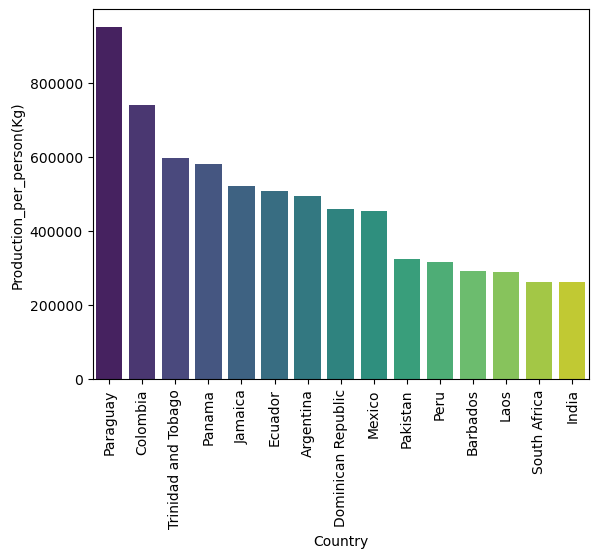

In [102]:

df_yield = df.sort_values("Production_per_person(Kg)", ascending = False).head(15)
ax = sns.barplot(data = df_yield,  x= "Country", y = "Production_per_person(Kg)", hue = "Country",palette = "viridis",legend = False)
ax.set_xticks(range(len(df_acr["Country"])))
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

#### Production per person is highest in Paraguay

## Correlation

In [108]:
df.corr(numeric_only = True)


,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


<Axes: >

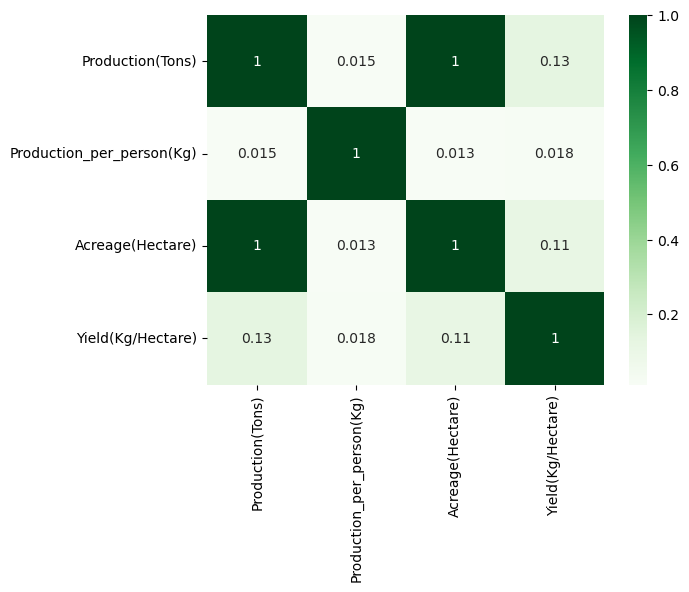

In [112]:
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap="Greens")


## Do countries with highest land produce more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

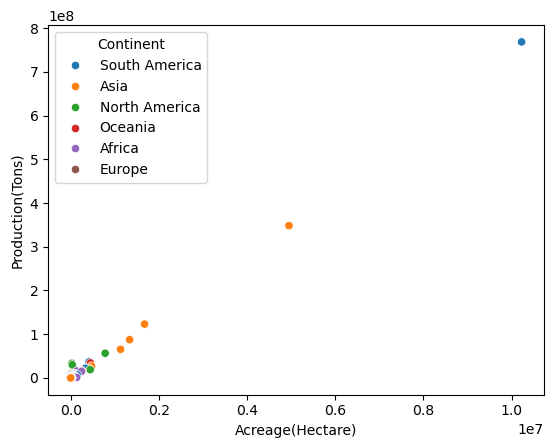

In [117]:
sns.scatterplot(data = df, x = "Acreage(Hectare)", y = "Production(Tons)", hue = "Continent" )

#### Overall increase in land increses the production

## Do countries which yield more sugarcane per hectare produces more sugarcane in total?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

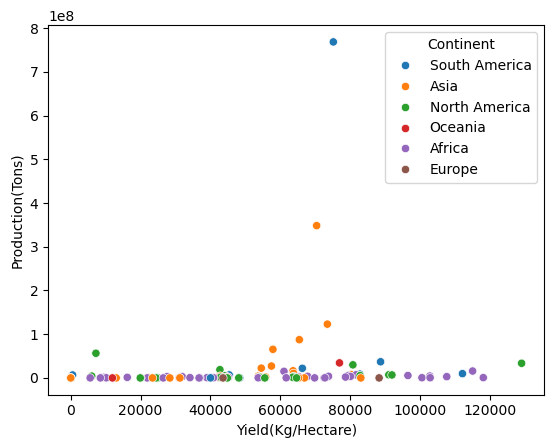

In [121]:
sns.scatterplot(data = df, x = "Yield(Kg/Hectare)" , y = "Production(Tons)", hue = "Continent")

In [123]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


# Analysis for Continent

In [126]:
df_continent = df.groupby("Continent").sum()


In [135]:
df_continent["number_of_countries"] = df.groupby("Continent").count()["Country"]


In [137]:
df_continent

,Country,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


## Which continent produces maximum sugarcane?

<Axes: xlabel='Continent'>

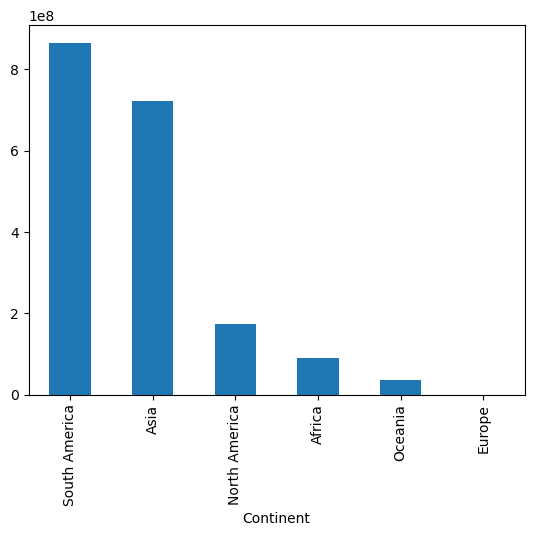

In [140]:
df_continent["Production(Tons)"].sort_values(ascending =  False).plot(kind = "bar")

## Do number of countries in a Continent effects production of sugarcane?

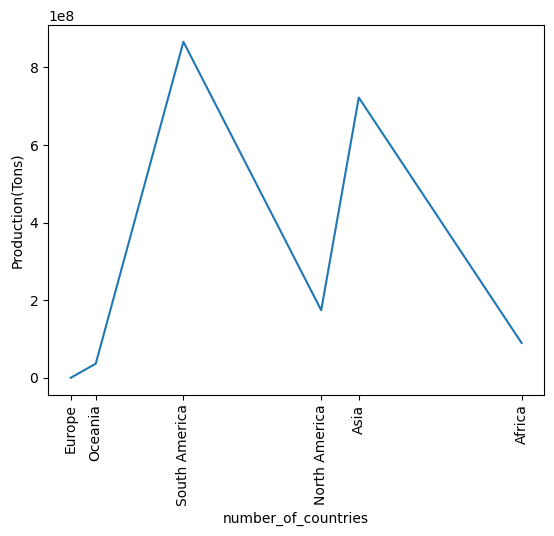

In [143]:
continent_names = df_continent.index.to_list()
sns.lineplot(data = df_continent,x = "number_of_countries", y= "Production(Tons)" )
plt.xticks(df_continent["number_of_countries"], continent_names, rotation =90)
plt.show()



## Do continent with highest land produces more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

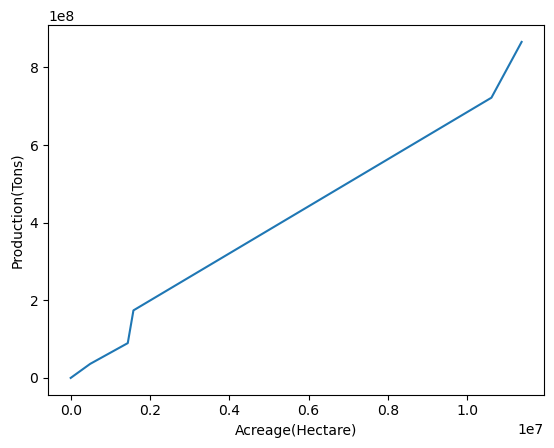

In [146]:
sns.lineplot(data = df_continent,x = "Acreage(Hectare)", y= "Production(Tons)" )

# Production distribution by continent

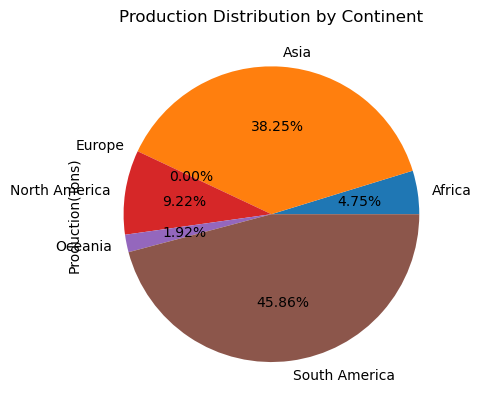

In [149]:

df_continent["Production(Tons)"].plot(kind = "pie", autopct = "%.2f%%")
plt.title('Production Distribution by Continent')
plt.show()

## Correlation for continent

In [152]:
df_continent.corr(numeric_only = True)

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Production(Tons),1.000000,0.522211,0.994897,0.091201,0.109244
Production_per_person(Kg),0.522211,1.000000,0.463215,0.542961,0.540086
Acreage(Hectare),0.994897,0.463215,1.000000,0.111166,0.132817
Yield(Kg/Hectare),0.091201,0.542961,0.111166,1.000000,0.989712
number_of_countries,0.109244,0.540086,0.132817,0.989712,1.000000
